In [1]:
import gluoncv as gcv
import mxnet as mx
import matplotlib.pyplot as plt


In [2]:
image_url = 'https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg'
image_filepath = "dog.jpg"
gcv.utils.download(url =image_url, path = image_filepath)

'dog.jpg'

In [3]:
image = mx.image.imread(image_filepath)
print('1.type          :', type(image))
print("2.shape         :", image.shape)
print("3.data type     :", image.dtype)
print("4.min value     :", image.min().asscalar)
print("\n5.maximum value :", image.max().asscalar)

1.type          : <class 'mxnet.ndarray.ndarray.NDArray'>
2.shape         : (576, 768, 3)
3.data type     : <class 'numpy.uint8'>
4.min value     : <bound method NDArray.asscalar of 
[0]
<NDArray 1 @cpu(0)>>

5.maximum value : <bound method NDArray.asscalar of 
[255]
<NDArray 1 @cpu(0)>>


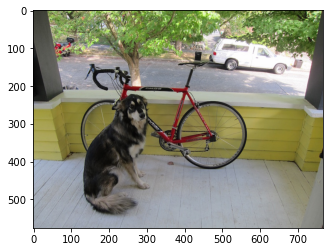

In [4]:
#visualiz image
plt.imshow(image.asnumpy())

In [5]:
from mxnet.gluon.data.vision import transforms

transform_fn = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406], [.229, .224, .225])
])

In [6]:
image =transform_fn(image)
print('1.type          :', type(image))
print("2.shape         :", image.shape)
print("3.data type     :", image.dtype)
print("4.min value     :", image.min().asscalar)
print("\n5.maximum value :", image.max().asscalar)

1.type          : <class 'mxnet.ndarray.ndarray.NDArray'>
2.shape         : (3, 576, 768)
3.data type     : <class 'numpy.float32'>
4.min value     : <bound method NDArray.asscalar of 
[-2.117904]
<NDArray 1 @cpu(0)>>

5.maximum value : <bound method NDArray.asscalar of 
[2.64]
<NDArray 1 @cpu(0)>>


In [7]:
#batch image
image= image.expand_dims(0)
print(image.shape)

(1, 3, 576, 768)


In [8]:
#load model
network = gcv.model_zoo.get_model('fcn_resnet50_ade', pretrained =True)

In [9]:
!ls -sh /home/ec2-user/.mxnet/models/fcn-resnet50_ade-3479525a.params

ls: cannot access '/home/ec2-user/.mxnet/models/fcn-resnet50_ade-3479525a.params': No such file or directory


In [18]:
#Image prediction
output = network.demo(image)
print(output.shape)

(1, 150, 576, 768)


In [19]:
output = output[0]
print(output.shape)

(150, 576, 768)


In [21]:
px_height, px_width = 300, 500

In [22]:
px_logit =output[:, px_height, px_width]

In [23]:
px_probability = mx.nd.softmax(px_logit)
px_rounded_probability = mx.nd.round(px_probability*100)/100
print(px_rounded_probability)


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.96 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 150 @cpu(0)>


In [24]:
class_index = mx.nd.argmax(px_logit, axis =0)
class_index = class_index[0].astype("int").asscalar()
print(class_index)


127


In [28]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation


In [31]:
class_lable = ADE20KSegmentation.CLASSES[class_index]
print(class_lable)

bicycle, bike, wheel, cycle


In [32]:
output_proba = mx.nd.softmax(output,axis =0)

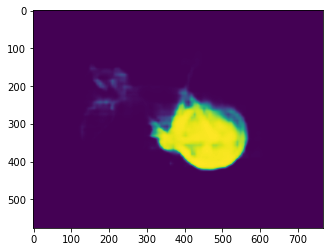

In [33]:
output_heatmap = output_proba[127]
plt.imshow(output_heatmap.asnumpy())

In [34]:
#visualize most likely class
prediction = mx.nd.argmax(output,0 ).asnumpy()
print(prediction.shape)

(576, 768)


In [35]:
print(prediction)

[[0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 ...
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]]


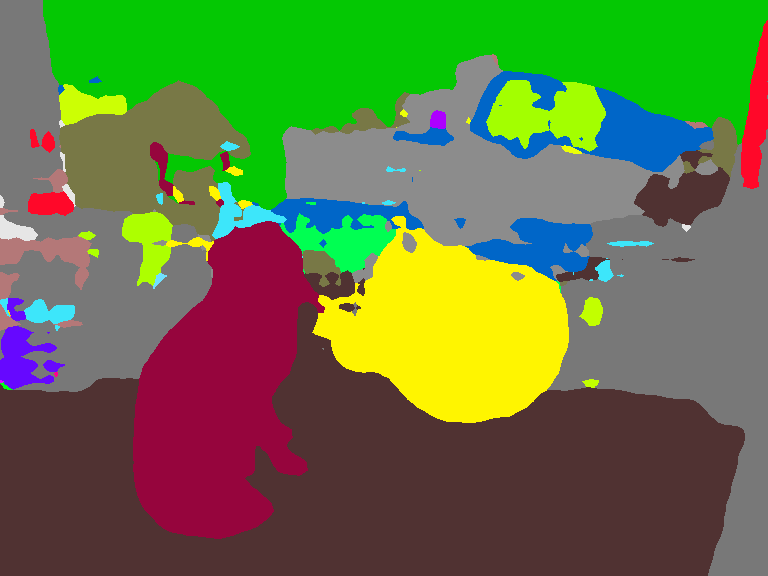

In [39]:
from gluoncv.utils.viz import get_color_pallete
prediction_images =get_color_pallete(prediction, "ade20k")
prediction_images